In [2]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [19]:
import re
import pandas as pd

# Raw chess game data split into white and black move strings
chess_data_white = """
1. e4 {[%clk 0:02:01][%timestamp 1]}
2. Nc3 {[%clk 0:02:01.2][%timestamp 8]}
3. f4 {[%clk 0:02:01.8][%timestamp 4]}
4. Nf3 {[%clk 0:02:02.3][%timestamp 5]}
5. Bb5 {[%clk 0:02:02.7][%timestamp 6]}
6. a4 {[%clk 0:02:01.9][%timestamp 18]}
7. O-O {[%clk 0:02:02.2][%timestamp 7]}
8. e5 {[%clk 0:02:01.6][%timestamp 16]}
9. Ne4 {[%clk 0:01:59.9][%timestamp 27]}
10. Nxc5 {[%clk 0:01:58.8][%timestamp 21]}
11. Bxc6 {[%clk 0:01:45.9][%timestamp 139]}
12. Nxd4 {[%clk 0:01:44.3][%timestamp 26]}
13. Kh1 {[%clk 0:01:44.6][%timestamp 7]}
14. c3 {[%clk 0:01:45][%timestamp 6]}
15. d4 {[%clk 0:01:45.2][%timestamp 8]}
16. a5 {[%clk 0:01:45][%timestamp 12]}
17. b3 {[%clk 0:01:36.7][%timestamp 93]}
18. Ba3 {[%clk 0:01:36.7][%timestamp 10]}
19. Bb4 {[%clk 0:01:35.5][%timestamp 22]}
20. Qxf1 {[%clk 0:01:36.4][%timestamp 1]}
21. Rxf1 {[%clk 0:01:37.2][%timestamp 2]}
"""

chess_data_black = """
1... c5 {[%clk 0:01:59.3][%timestamp 17]}
2... Nc6 {[%clk 0:01:58.2][%timestamp 21]}
3... g6 {[%clk 0:01:58.3][%timestamp 9]}
4... Bg7 {[%clk 0:01:55.2][%timestamp 41]}
5... Nd4 {[%clk 0:01:53.7][%timestamp 25]}
6... e6 {[%clk 0:01:51.3][%timestamp 34]}
7... Ne7 {[%clk 0:01:50.9][%timestamp 14]}
8... Nec6 {[%clk 0:01:43.5][%timestamp 84]}
9... O-O {[%clk 0:01:39.1][%timestamp 54]}
10... Qb6 {[%clk 0:01:12.8][%timestamp 273]}
11... Qxc5 {[%clk 0:01:05.3][%timestamp 85]}
12... Qxd4+ {[%clk 0:01:05.3][%timestamp 10]}
13... bxc6 {[%clk 0:00:59.7][%timestamp 66]}
14... Qb6 {[%clk 0:00:58.9][%timestamp 18]}
15... d5 {[%clk 0:00:58.2][%timestamp 17]}
16... Qb5 {[%clk 0:00:55][%timestamp 42]}
17... Ba6 {[%clk 0:00:54.3][%timestamp 17]}
18... Rfb8 {[%clk 0:00:53.4][%timestamp 19]}
19... Qxf1+ {[%clk 0:00:50.6][%timestamp 38]}
20... Bxf1 {[%clk 0:00:50.5][%timestamp 11]}
21... Rb7 {[%clk 0:00:49.3][%timestamp 22]}
"""

# Define regex patterns for white and black moves
white_move_pattern = re.compile(r"(\d+)\.\s(\S+)\s\{\[%clk\s+([^\]]+)\]\[%timestamp\s+(\d+)\]\}")
black_move_pattern = re.compile(r"(\d+)\.\.\.\s(\S+)\s\{\[%clk\s+([^\]]+)\]\[%timestamp\s+(\d+)\]\}")

# Extract white moves
white_moves = re.findall(white_move_pattern, chess_data_white)
black_moves = re.findall(black_move_pattern, chess_data_black)

# Initialize lists for parsed data
move_number = []
white_move = []
white_clock = []
white_timestamp = []
black_move = []
black_clock = []
black_timestamp = []

# Populate data from parsed white and black moves
for white, black in zip(white_moves, black_moves):
    move_number.append(int(white[0]))
    white_move.append(white[1])
    white_clock.append(white[2])
    white_timestamp.append(int(white[3]))
    black_move.append(black[1])
    black_clock.append(black[2])
    black_timestamp.append(int(black[3]))

# Create a DataFrame from parsed data
chess_df = pd.DataFrame({
    "Move Number": move_number,
    "White Move": white_move,
    "White Clock": white_clock,
    "White Thinking Time": white_timestamp,
    "Black Move": black_move,
    "Black Clock": black_clock,
    "Black Thinking Time": black_timestamp
})


In [20]:
display(chess_df)

,Move Number,White Move,White Clock,White Thinking Time,Black Move,Black Clock,Black Thinking Time
0,1,e4,0:02:01,1,c5,0:01:59.3,17
1,2,Nc3,0:02:01.2,8,Nc6,0:01:58.2,21
2,3,f4,0:02:01.8,4,g6,0:01:58.3,9
3,4,Nf3,0:02:02.3,5,Bg7,0:01:55.2,41
4,5,Bb5,0:02:02.7,6,Nd4,0:01:53.7,25
5,6,a4,0:02:01.9,18,e6,0:01:51.3,34
6,7,O-O,0:02:02.2,7,Ne7,0:01:50.9,14
7,8,e5,0:02:01.6,16,Nec6,0:01:43.5,84
8,9,Ne4,0:01:59.9,27,O-O,0:01:39.1,54
9,10,Nxc5,0:01:58.8,21,Qb6,0:01:12.8,273


In [21]:
chess_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Move Number          21 non-null     int64 
 1   White Move           21 non-null     object
 2   White Clock          21 non-null     object
 3   White Thinking Time  21 non-null     int64 
 4   Black Move           21 non-null     object
 5   Black Clock          21 non-null     object
 6   Black Thinking Time  21 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 1.3+ KB


In [22]:
# Load the Excel file
file_path = "Data/Chess.com_data.xlsx"

# Read the Excel file into a DataFrame
chess_data_df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame to verify the content
chess_data_df.head()

,White move,Current score state,Unnamed: 2,Black move,Current score state 2
0,e4,0.25,NaN,c5,0.41
1,Nc3,0.28,NaN,Nc6,0.28
2,f4,-0.16,NaN,g6,-0.16
3,Nf3,-0.19,NaN,Bg7,-0.19
4,Bb5,-0.21,NaN,Nd4,-0.21


In [23]:
# Drop the 'Unnamed: 2' column and the first row
chess_data_df.drop(columns=['Unnamed: 2'], inplace=True, errors='ignore')

chess_data_df

,White move,Current score state,Black move,Current score state 2
0,e4,0.25,c5,0.41
1,Nc3,0.28,Nc6,0.28
2,f4,-0.16,g6,-0.16
3,Nf3,-0.19,Bg7,-0.19
4,Bb5,-0.21,Nd4,-0.21
5,a4,-0.32,e6,-0.10
6,O-O,-0.27,Ne7,-0.08
7,e5,-0.21,Nec6,1.19
8,Ne4,1.19,O-O,1.19
9,Nxc5,-0.30,Qb6,-0.30


In [24]:
# Create a new list to concatenate the current score states
all_current_scores = []

# Interleave values from 'Current Score State' and 'Current Score State 2'
for index, row in chess_data_df.iterrows():
    all_current_scores.append(row["Current score state"])
    all_current_scores.append(row["Current score state 2"])

# Create a new DataFrame from the concatenated list
current_scores_df = pd.DataFrame(all_current_scores, columns=["Current Score"])


In [9]:
current_scores_df

,Current Score
0,0.25
1,0.41
2,0.28
3,0.28
4,-0.16
5,-0.16
6,-0.19
7,-0.19
8,-0.21
9,-0.21


In [26]:
output_path = "Data/Chess/current_scores_chess_df.csv"
current_scores_df.to_csv(output_path, index=False)

In [10]:
import pandas as pd

# Create a new dataframe for merged data
merged_thinking_times = []
turns = []

# Zigzag merge of White and Black thinking times, starting with White
for index, row in chess_df.iterrows():
    merged_thinking_times.append(row['White Thinking Time'])
    turns.append('White')
    merged_thinking_times.append(row['Black Thinking Time'])
    turns.append('Black')

# Create a new dataframe with merged thinking times
chess_data = pd.DataFrame({
    'Thinking Time': merged_thinking_times,
    'Turn': turns  # Add a column to identify White or Black move
})

# Define the game's end time
end_time = pd.Timestamp("2024-09-20 14:56:56")

# Calculate actual timestamps starting from the end time
actual_timestamps = []
current_time = end_time

# Iterate through thinking times backward
for i, time in enumerate(reversed(chess_data['Thinking Time'])):
    if i == 0:
        # The last move timestamp is exactly the end time
        actual_timestamps.append(current_time)
    else:
        # Subtract the thinking time for other moves
        thinking_duration = pd.Timedelta(seconds=time)
        current_time -= thinking_duration
        actual_timestamps.append(current_time)

# Reverse the timestamps to align with the original order
chess_data['Actual Timestamp'] = actual_timestamps[::-1]

# Display the corrected chess_data dataframe
display(chess_data)


,Thinking Time,Turn,Actual Timestamp
0,1,White,2024-09-20 14:34:42
1,17,Black,2024-09-20 14:34:43
2,8,White,2024-09-20 14:35:00
3,21,Black,2024-09-20 14:35:08
4,4,White,2024-09-20 14:35:29
5,9,Black,2024-09-20 14:35:33
6,5,White,2024-09-20 14:35:42
7,41,Black,2024-09-20 14:35:47
8,6,White,2024-09-20 14:36:28
9,25,Black,2024-09-20 14:36:34


[0.1, 1.8, 2.6, 4.7, 5.1, 6.0, 6.5, 10.6, 11.2, 13.7, 15.5, 18.9, 19.6, 21.0, 22.6, 31.0, 33.7, 39.1, 41.2, 68.5, 82.4, 90.9, 93.5, 94.5, 95.2, 101.8, 102.4, 104.2, 105.0, 106.7, 107.9, 112.1, 121.4, 123.1, 124.1, 126.0, 128.2, 132.0, 132.1, 133.2, 133.4, 135.6]
[datetime.datetime(2024, 9, 20, 14, 54, 0, 100000), datetime.datetime(2024, 9, 20, 14, 54, 1, 800000), datetime.datetime(2024, 9, 20, 14, 54, 2, 600000), datetime.datetime(2024, 9, 20, 14, 54, 4, 700000), datetime.datetime(2024, 9, 20, 14, 54, 5, 100000), datetime.datetime(2024, 9, 20, 14, 54, 6), datetime.datetime(2024, 9, 20, 14, 54, 6, 500000), datetime.datetime(2024, 9, 20, 14, 54, 10, 600000), datetime.datetime(2024, 9, 20, 14, 54, 11, 200000), datetime.datetime(2024, 9, 20, 14, 54, 13, 700000), datetime.datetime(2024, 9, 20, 14, 54, 15, 500000), datetime.datetime(2024, 9, 20, 14, 54, 18, 900000), datetime.datetime(2024, 9, 20, 14, 54, 19, 600000), datetime.datetime(2024, 9, 20, 14, 54, 21), datetime.datetime(2024, 9, 20, 

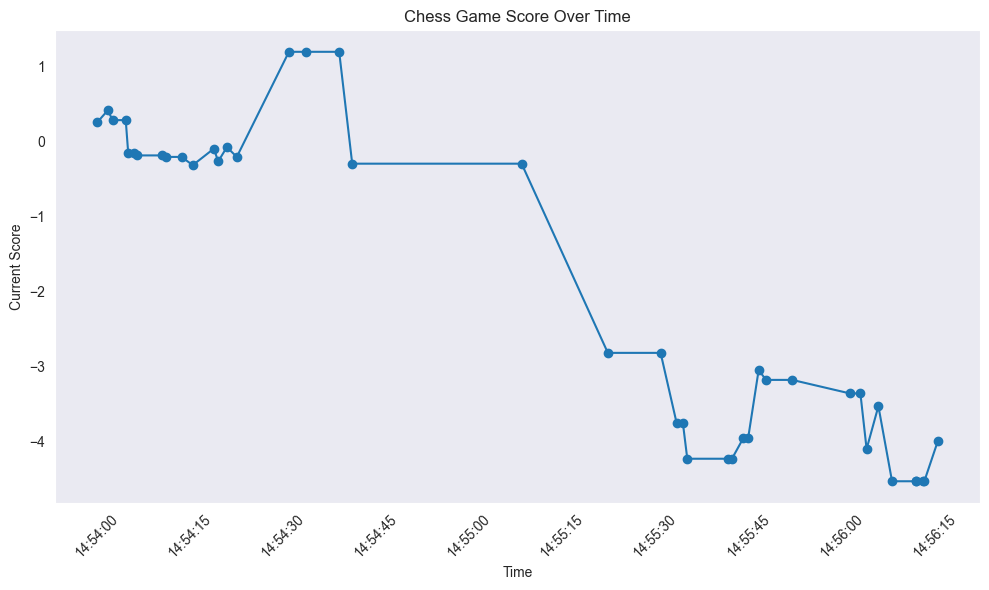

In [11]:
import datetime
import matplotlib.pyplot as plt

# Game metadata
end_time_str = "12:56:56"  # End time from metadata
game_start_time = datetime.datetime(2024, 9, 20, 12, 54, 0)  # Adjusted start time
game_start_time = game_start_time + datetime.timedelta(hours=2)  # Add 2 hours to match timezone

# Extract 'Thinking Time' and 'Current Score' from the DataFrames
timestamps = chess_data['Thinking Time'].tolist()
scores = current_scores_df['Current Score'].tolist()

# Convert timestamps (centiseconds) to cumulative seconds
cumulative_seconds = [sum(timestamps[:i+1]) / 10 for i in range(len(timestamps))]
print(cumulative_seconds)
# Generate real-world timestamps
real_timestamps = [game_start_time + datetime.timedelta(seconds=secs) for secs in cumulative_seconds]
print(real_timestamps)
# Plot the scores against time
plt.figure(figsize=(10, 6))
plt.plot(real_timestamps, current_scores_df['Current Score'], marker='o')
plt.title("Chess Game Score Over Time")
plt.xlabel("Time")
plt.ylabel("Current Score")
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
import datetime
import matplotlib.pyplot as plt

# Example DataFrames (replace these with actual data)
import pandas as pd


# Game metadata
end_time_str = "12:56:56"  # End time from metadata
game_end_time = datetime.datetime.strptime(end_time_str, "%H:%M:%S")  # Parse end time
game_end_time = game_end_time.replace(year=2024, month=9, day=20)  # Set date
game_end_time += datetime.timedelta(hours=2)  # Adjust for timezone

# Extract 'Thinking Time' and 'Current Score' from DataFrames
timestamps = chess_data['Thinking Time'].tolist()
scores = current_scores_df['Current Score'].tolist()

# Convert timestamps (centiseconds) to cumulative seconds
cumulative_seconds = [sum(timestamps[:i+1]) / 10 for i in range(len(timestamps))]

# Calculate real timestamps based on the end time, going backwards
real_timestamps = [game_end_time - datetime.timedelta(seconds=(cumulative_seconds[-1] - secs)) for secs in cumulative_seconds]
print(len(scores))
# Add real_timestamps as a new column in current_scores_df
current_scores_df['Score Timestamps'] = real_timestamps
# Verify real timestamps
print(current_scores_df)



42
    Current Score        Score Timestamps
0            0.25 2024-09-20 14:54:40.500
1            0.41 2024-09-20 14:54:42.200
2            0.28 2024-09-20 14:54:43.000
3            0.28 2024-09-20 14:54:45.100
4           -0.16 2024-09-20 14:54:45.500
5           -0.16 2024-09-20 14:54:46.400
6           -0.19 2024-09-20 14:54:46.900
7           -0.19 2024-09-20 14:54:51.000
8           -0.21 2024-09-20 14:54:51.600
9           -0.21 2024-09-20 14:54:54.100
10          -0.32 2024-09-20 14:54:55.900
11          -0.10 2024-09-20 14:54:59.300
12          -0.27 2024-09-20 14:55:00.000
13          -0.08 2024-09-20 14:55:01.400
14          -0.21 2024-09-20 14:55:03.000
15           1.19 2024-09-20 14:55:11.400
16           1.19 2024-09-20 14:55:14.100
17           1.19 2024-09-20 14:55:19.500
18          -0.30 2024-09-20 14:55:21.600
19          -0.30 2024-09-20 14:55:48.900
20          -2.82 2024-09-20 14:56:02.800
21          -2.82 2024-09-20 14:56:11.300
22          -3.76 2024-09-20 14

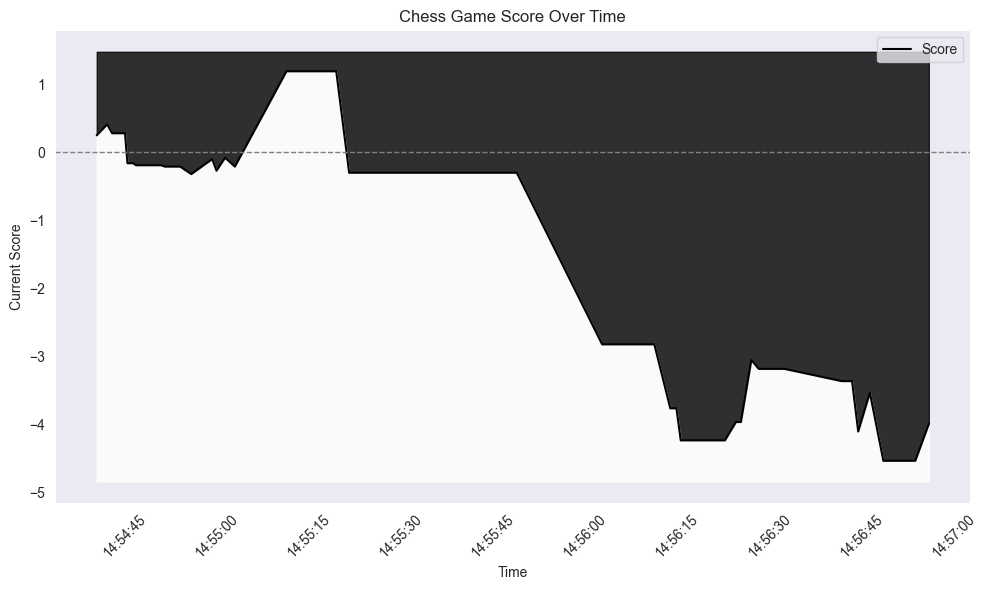

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(real_timestamps, scores, color='black', linestyle='-', label="Score")
#plt.fill_between(real_timestamps, scores, 0, where=[score >= 0 for score in scores], color='white', label="White Player", alpha=0.6)
#plt.fill_between(real_timestamps, scores, 0, where=[score < 0 for score in scores], color='black', label="Black Player", alpha=0.6)
plt.fill_between(real_timestamps, scores, plt.ylim()[1], color='black', alpha=0.8)  # Fill above line (black)
plt.fill_between(real_timestamps, scores, plt.ylim()[0], color='white', alpha=0.8)  # Fill below line (white)

# Plot formatting
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Horizontal line at score = 0
plt.title("Chess Game Score Over Time")
plt.xlabel("Time")
plt.ylabel("Current Score")
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
# Filter RRI times to match the range in current_scores_df['Timestamps']
start_time = current_scores_df['Score Timestamps'].min()
end_time = current_scores_df['Score Timestamps'].max()

filtered_rri = df_rr_filtered[(df_rr_filtered['adjusted_time'] >= start_time) & (df_rr_filtered['adjusted_time'] <= end_time)]

# Add filtered RRi times as a new column in current_scores_df
filtered_rri_times = filtered_rri['adjusted_time'].tolist()
# Align RRi times with the Timestamps in current_scores_df
# Ensure the filtered RRI times are mapped to scores, filling NAs if there are fewer RRi times
current_scores_df['Filtered RRi Times'] = pd.Series(filtered_rri_times[:len(current_scores_df)])

# Display the updated DataFrame
print(current_scores_df)

NameError: name 'df_rr_filtered' is not defined

In [15]:
# Step 1: Load the RRi Data
# Example CSV file path (replace with your actual file path)
rr_file = 'Data/RR_2024_09_20_14_54.csv'

# Load the RRi data
df_rr = pd.read_csv(rr_file)

# Convert timestamp to numeric
df_rr['timestamp'] = pd.to_numeric(df_rr['timestamp'], errors='coerce')

# Convert timestamp to datetime and adjust to local timezone (UTC+2)
df_rr['adjusted_time'] = pd.to_datetime(df_rr['timestamp'] / 1000, unit='s', errors='coerce')
df_rr['adjusted_time'] = df_rr['adjusted_time'] + pd.DateOffset(hours=2)

# Step 2: Filter the RRi Data
# Define the end time for filtering
end_time = pd.to_datetime("2024-09-20 14:56:56")
start_time = pd.to_datetime("2024-09-20 14:54:40.500")

# Filter the RRi data within the chess game's timeframe
df_rr_filtered = df_rr[(df_rr['adjusted_time'] >= start_time) & (df_rr['adjusted_time'] <= end_time)]

# Print the filtered RRi data range
print(f"Filtered RRi Data Range: {df_rr_filtered['adjusted_time'].min()} to {df_rr_filtered['adjusted_time'].max()}")

# Step 3: Create a new DataFrame with the filtered timestamps and sample values
filtered_rri_df = df_rr_filtered[['adjusted_time', 'sample']]

# Rename columns for clarity (optional, based on your existing dataframe)
filtered_rri_df.rename(columns={
    'adjusted_time': 'RRi Timestamp',
    'sample': 'RRi'
}, inplace=True)

# Display the new filtered DataFrame
print(filtered_rri_df)


Filtered RRi Data Range: 2024-09-20 14:54:40.867000064 to 2024-09-20 14:56:55.947000064
                    RRi Timestamp  RRi
36  2024-09-20 14:54:40.867000064  840
37  2024-09-20 14:54:41.692000000  832
38  2024-09-20 14:54:42.516000000  816
39  2024-09-20 14:54:43.323000064  816
40  2024-09-20 14:54:44.155000064  824
..                            ...  ...
200 2024-09-20 14:56:52.980000000  736
201 2024-09-20 14:56:53.724000000  744
202 2024-09-20 14:56:54.467000064  744
203 2024-09-20 14:56:55.204000000  744
204 2024-09-20 14:56:55.947000064  736

[169 rows x 2 columns]


C:\Users\Dominik\AppData\Local\Temp\ipykernel_25628\1124293796.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rri_df.rename(columns={


In [16]:
filtered_rri_df

,RRi Timestamp,RRi
36,2024-09-20 14:54:40.867000064,840
37,2024-09-20 14:54:41.692000000,832
38,2024-09-20 14:54:42.516000000,816
39,2024-09-20 14:54:43.323000064,816
40,2024-09-20 14:54:44.155000064,824
...,...,...
200,2024-09-20 14:56:52.980000000,736
201,2024-09-20 14:56:53.724000000,744
202,2024-09-20 14:56:54.467000064,744
203,2024-09-20 14:56:55.204000000,744


In [17]:

# Step 1: Filter RRI data to match the range of `current_scores_df['Timestamps']`
start_time = current_scores_df['Score Timestamps'].min()
end_time = current_scores_df['Score Timestamps'].max()

filtered_rri_df = filtered_rri_df[
    (filtered_rri_df['RRi Timestamp'] >= start_time) &
    (filtered_rri_df['RRi Timestamp'] <= end_time)
]

# Step 2: Map RRI data to current scores timestamps
# For each timestamp in current_scores_df, find the nearest RRI timestamp
filtered_rri_times = []
filtered_rri_values = []

for timestamp in current_scores_df['Score Timestamps']:
    # Find the closest RRI timestamp
    closest_rri_row = filtered_rri_df.iloc[(filtered_rri_df['RRi Timestamp'] - timestamp).abs().argsort()[:1]]
    filtered_rri_times.append(closest_rri_row['RRi Timestamp'].values[0])
    filtered_rri_values.append(closest_rri_row['RRi'].values[0])

# Step 3: Add the mapped RRI times and values to the current_scores_df
current_scores_df['Mapped RRi Timestamp'] = filtered_rri_times
current_scores_df['Mapped RRi'] = filtered_rri_values



In [18]:
current_scores_df.drop(columns='Filtered RRi Times', inplace=True)
current_scores_df

KeyError: "['Filtered RRi Times'] not found in axis"

In [ ]:
output_path = "Data/current_scores_chess.csv"
current_scores_df.to_csv(output_path, index=False)

In [ ]:
filtered_rri_df

In [ ]:
# Calculate the correlation between Mapped RRi and Current Score
correlation = current_scores_df['Mapped RRi'].corr(current_scores_df['Current Score'])

# Display the correlation result
print(f"Correlation between Mapped RRi and Current Score: {correlation}")
